# Британские гласные

### Задача многоклассовой классификации: распознование британских гласных по [данным с динамиков](https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass.html).

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import ensemble, cross_validation, learning_curve, metrics, datasets, tree, grid_search
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

/home/filippovaanastasia/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/filippovaanastasia/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)
/home/filippovaanastasia/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. 

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Загружаем данные
data = pd.read_csv("vowel.scale", sep = "\s+ | |:", header = None, engine = 'python')

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0,1,-0.263700,2,-0.466919,3,-0.068205,4,0.771111,5,...,6,0.557382,7,-0.218367,8,0.228591,9,-0.494182,10,-0.436931
1,1,1,-0.117564,2,-0.442344,3,-0.080513,4,0.541111,5,...,6,0.750869,7,-0.201361,8,0.215779,9,-0.321013,10,-0.224967
2,2,1,0.447775,2,-0.316950,3,-0.532821,4,-0.135556,5,...,6,0.514385,7,-0.348299,8,0.327714,9,-0.449692,10,0.060468
3,3,1,0.369555,2,-0.028670,3,-0.492821,4,0.345000,5,...,6,0.198862,7,-0.340136,8,0.030344,9,0.041752,10,-0.424577
4,4,1,0.223888,2,0.011972,3,-0.158462,4,0.372778,5,...,6,0.011698,7,0.313605,8,-0.229265,9,0.293634,10,-0.165150


In [6]:
# удаляем не нужные столбцы
X = data.iloc[:,0:22:2]
X.columns = ['vowel_number', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 11 columns):
vowel_number    528 non-null int64
1               528 non-null float64
2               528 non-null float64
3               528 non-null float64
4               528 non-null float64
5               528 non-null float64
6               528 non-null float64
7               528 non-null float64
8               528 non-null float64
9               528 non-null float64
10              528 non-null float64
dtypes: float64(10), int64(1)
memory usage: 45.5 KB


Отлично, пропущенных значений в данных нет.

In [8]:
# посмотрим на распределение меток классов
X['vowel_number'].value_counts()

10    48
9     48
8     48
7     48
6     48
5     48
4     48
3     48
2     48
1     48
0     48
Name: vowel_number, dtype: int64

Классы сбалансированы.

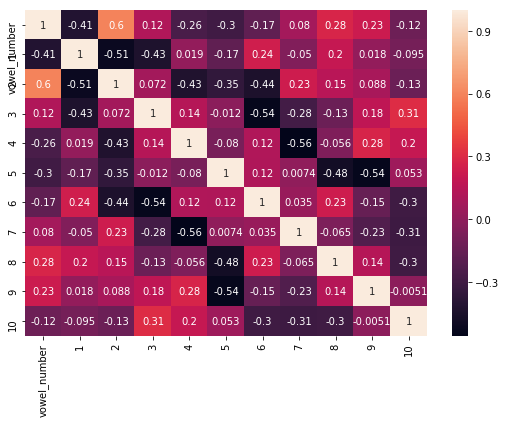

In [9]:
# корреляция признаков
plt.figure(figsize(9,6))
sns.heatmap(X.corr(), annot = True)

In [10]:
selector = SelectKBest(f_classif, k='all')
selector.fit(X.drop(['vowel_number'], axis=1), X.vowel_number)
scores = -np.log10(selector.pvalues_)

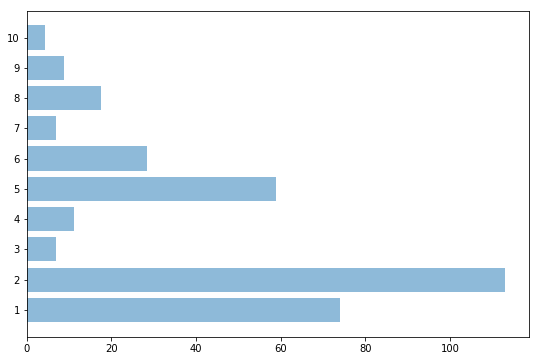

In [11]:
# Оценим важность наших признаков
plt.figure(figsize(9,6))
plt.barh(np.arange(len(X.columns.values)-1), scores, align='center', alpha=0.5)
plt.yticks(np.arange(len(X.columns.values)-1), range(1,11))
plt.show()

Возьмем лучшие 4 признака и посмотрим на данные в проекциях на разные пары признаков.

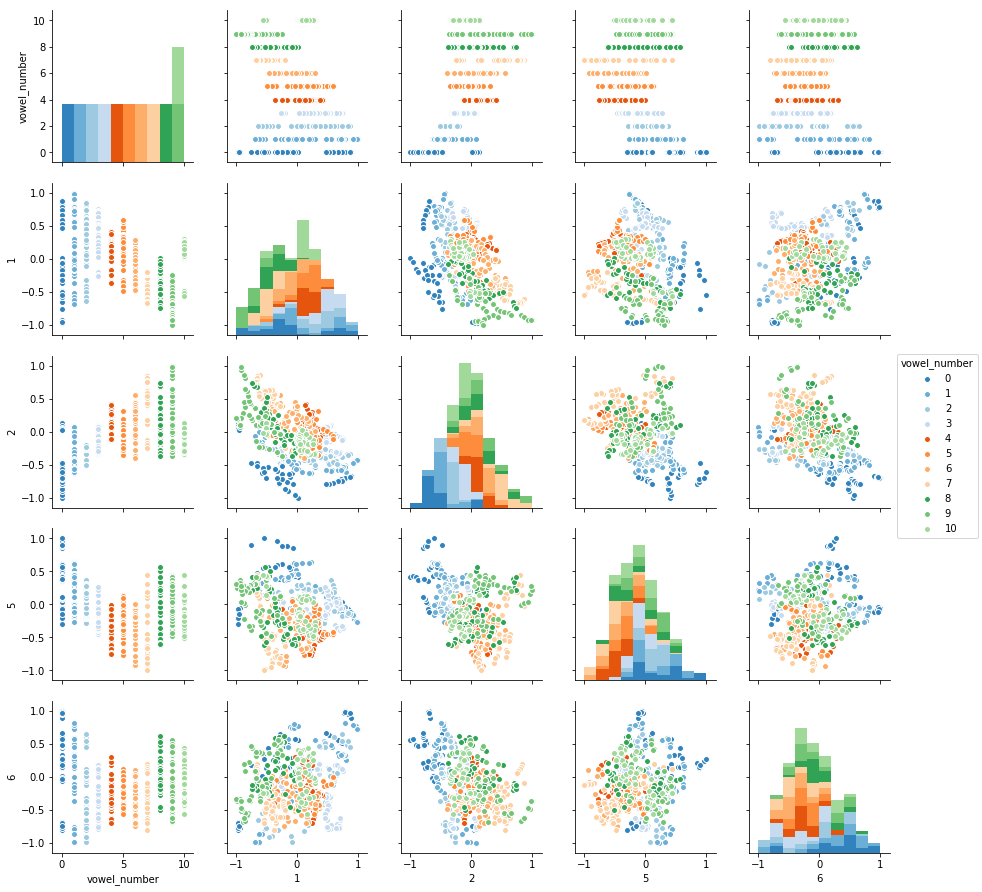

In [13]:
# данные в проекциях на различные оси 
sns.pairplot(X.iloc[:, [0,1,2,5,6]], hue = 'vowel_number', palette = 'tab20c')

In [14]:
y = X.vowel_number

In [15]:
#разделим выборку на обучение и тест(распределение классов в обучающей и в тестовой выборках одинаковое)
train_data, test_data, train_labels, test_labels = train_test_split(X.drop('vowel_number', axis = 1), y,
                                                                    random_state = 1, 
                                                                    test_size = 0.3,
                                                                    stratify = y)


# Решающее дерево

In [17]:
#найдем оптимальные параметры модели с помощью поиска по сетке
from sklearn import grid_search

In [18]:
#cоздадим стратегию cross-validation
cv = cross_validation.StratifiedShuffleSplit(train_labels, n_iter = 5, test_size = 0.2, random_state = 1)

In [19]:
#посмотрим на параметры классификатора
clf = tree.DecisionTreeClassifier(random_state = 0)
clf.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 0,
 'splitter': 'best'}

In [20]:
#создадим словарь для выбора параметров

parameters_grid = {
    'max_depth' : np.arange(1,30),
    'max_features' : np.arange(1,11),
    'min_samples_leaf':[5]   #количество элементов в листе не меньше 5, чтобы дерево не переобучалось
}

In [21]:
#создадим сетку
grid_cv = grid_search.GridSearchCV(clf, parameters_grid, scoring = 'accuracy', cv = cv)


In [22]:
%%time
grid_cv.fit(train_data, train_labels)

CPU times: user 3.61 s, sys: 15.8 ms, total: 3.63 s
Wall time: 3.63 s


GridSearchCV(cv=StratifiedShuffleSplit(labels=[7 9 ... 2 5], n_iter=5, test_size=0.2, random_state=1),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), 'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'min_samples_leaf': [5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [23]:
grid_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [25]:
print (grid_cv.best_score_)
print (grid_cv.best_params_)

0.6459459459459459
{'max_depth': 8, 'max_features': 7, 'min_samples_leaf': 5}


In [26]:
#оценка по отложенной тестовой выборке
round(grid_cv.best_estimator_.score(test_data, test_labels),2)

0.71

In [27]:
!pip install pydotplus

You are using pip version 19.0.3, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [27]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = export_graphviz(grid_cv.best_estimator_, out_file=None, 
                                feature_names=train_data.columns.values,  
                                class_names=[str(x) for x in range(11)])

# Изображаем граф
graph = pydotplus.graph_from_dot_data(dot_data)  

# Сохраняем изображение

Image(graph.create_png(),width=10000, height=100)
graph.write_png('tree.png')

True

In [170]:
print(metrics.classification_report(grid_cv.best_estimator_.predict(test_data), test_labels ))

             precision    recall  f1-score   support

          0       0.93      1.00      0.97        14
          1       1.00      0.74      0.85        19
          2       0.71      1.00      0.83        10
          3       0.71      0.62      0.67        16
          4       0.50      0.39      0.44        18
          5       0.47      0.37      0.41        19
          6       0.50      0.58      0.54        12
          7       0.73      0.85      0.79        13
          8       0.73      1.00      0.85        11
          9       1.00      0.88      0.93        16
         10       0.53      0.73      0.62        11

avg / total       0.72      0.71      0.70       159



## Преймущества: 
            1)интерпретируемость
            2)простота классификации
## Недостатки:
            1)легко переобучаются
            2)чувствительны к изменениям в данных
            3)только глубокие деревья могут улавливать сложные закономерности в данных
Деревья пытаются уловить сложные закономерности в данных и переобучаются. Вывод: используем композицию деревьев.

# Случайный лес 

In [30]:
random_forest = ensemble.RandomForestClassifier( random_state = 1)
random_forest.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [87]:
parameters_grid_rf = {
    'max_depth' : np.arange(1,30),
    'max_features' : np.arange(1,11),
    'n_estimators' : np.arange(1,30),
}

In [88]:
grid_cv_rf = grid_search.GridSearchCV(random_forest, parameters_grid_rf, scoring = 'accuracy', cv = cv)

In [36]:
%%time
grid_cv_rf.fit(train_data, train_labels)

CPU times: user 14min 46s, sys: 76.1 ms, total: 14min 46s
Wall time: 14min 47s


GridSearchCV(cv=StratifiedShuffleSplit(labels=[7 9 ... 2 5], n_iter=5, test_size=0.2, random_state=1),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), 'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), 'min_samples_leaf': [5]},


In [37]:
print (grid_cv_rf.best_score_)
print (grid_cv_rf.best_params_)
print (grid_cv_rf.best_estimator_.score(test_data, test_labels))

0.7918918918918919
{'max_depth': 9, 'max_features': 2, 'min_samples_leaf': 5, 'n_estimators': 28}
0.8805031446540881


In [40]:
print(metrics.classification_report(grid_cv_rf.best_estimator_.predict(test_data), test_labels ))

             precision    recall  f1-score   support

          0       0.87      1.00      0.93        13
          1       1.00      0.88      0.93        16
          2       0.93      1.00      0.96        13
          3       0.93      0.87      0.90        15
          4       0.86      0.63      0.73        19
          5       0.60      0.82      0.69        11
          6       0.64      0.75      0.69        12
          7       0.93      0.93      0.93        15
          8       0.93      0.93      0.93        15
          9       1.00      1.00      1.00        14
         10       1.00      0.94      0.97        16

avg / total       0.89      0.88      0.88       159



# Gradient Boosting

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
gb = GradientBoostingClassifier(random_state=1)
gb.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': 1,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

In [30]:
parameters_grid_gb = {
    'max_depth' : np.arange(1,9),
    'max_features' : np.arange(1,11),
    'n_estimators' : np.arange(1,150,10),
}


In [31]:
#используем случайный поиск по сетке,
#так как параметров много и обучение модели занимает долгое время, поэтому не так эффективно использовать 
#полный перебор по сетке -> случайный поиск по сетке
randomized_grid_cv = grid_search.RandomizedSearchCV(gb, parameters_grid_gb, scoring = 'accuracy', cv = cv, n_iter = 20, 
                                                                                random_state = 1)

In [32]:
%%time
randomized_grid_cv.fit(train_data,train_labels)

CPU times: user 52.4 s, sys: 10.5 ms, total: 52.4 s
Wall time: 52.4 s


RandomizedSearchCV(cv=StratifiedShuffleSplit(labels=[7 9 ... 2 5], n_iter=5, test_size=0.2, random_state=1),
          error_score='raise',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=1, subsample=1.0, verbose=0,
              warm_start=False),
          fit_params={}, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8]), 'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'n_estimators': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141])},
          pre_dispatch='2*n_jobs', random_state=1, refit=True,
  

In [33]:
print (randomized_grid_cv.best_score_)
print (randomized_grid_cv.best_params_)
print (randomized_grid_cv.best_estimator_.score(test_data, test_labels))

0.8729729729729729
{'n_estimators': 31, 'max_features': 3, 'max_depth': 8}
0.9433962264150944


Не будем снова запускать поиск по сетке, остановимся на найденном наборе параметров.

In [34]:
print(metrics.classification_report(randomized_grid_cv.best_estimator_.predict(test_data), test_labels ))

             precision    recall  f1-score   support

          0       1.00      0.94      0.97        16
          1       1.00      1.00      1.00        14
          2       1.00      1.00      1.00        14
          3       1.00      0.93      0.97        15
          4       1.00      0.88      0.93        16
          5       0.93      0.88      0.90        16
          6       0.79      1.00      0.88        11
          7       0.93      1.00      0.97        14
          8       1.00      0.88      0.94        17
          9       0.93      1.00      0.96        13
         10       0.80      0.92      0.86        13

avg / total       0.95      0.94      0.94       159



### Построим разделяющие области в проекции на 1 и 2 признаки.

In [50]:
from sklearn.model_selection import cross_val_score

In [61]:
%%time
scores = []
for i in np.arange(1, 30):
    clf = tree.DecisionTreeClassifier(max_depth = i, min_samples_leaf = 5, random_state = 1)
    score = cross_val_score( clf, train_data, train_labels,cv = 10)
    scores.append([score.mean(), i])

CPU times: user 908 ms, sys: 16 µs, total: 908 ms
Wall time: 904 ms


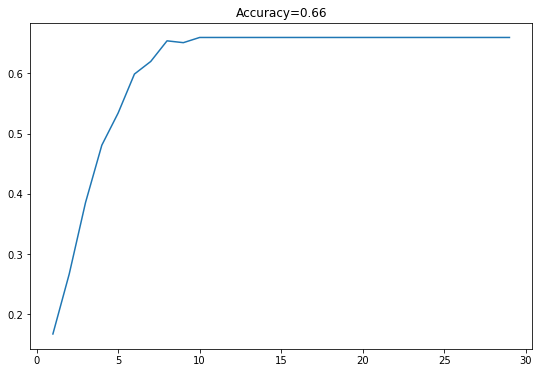

In [65]:
plt.figure(figsize = (9,6))
plt.plot(np.arange(1,30), np.array(scores)[:,0])
plt.title('Accuracy={:.2f}'.format(max(np.array(scores)[:,0])))
plt.show()

In [72]:
#colors = ListedColormap(['red', 'blue', 'yellow','black', 'maroon', 'olive','cadetblue','midnightblue',
#'darkslateblue', 'darkslategray','orange'])
clf = tree.DecisionTreeClassifier(max_depth =11, random_state = 1)
light_colors = ListedColormap(['c','azure','aliceblue','lavender','lavenderblush','mistyrose',
                               'white','powderblue','khaki','thistle','pink'])

In [73]:
#функция, которая строит "сетку"
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [74]:
#функция, строящая разделяющую поверхность
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, light_colors = light_colors):
    plt.figure(figsize = (16, 6))
    plt.subplot(1,2,1)
    estimator.fit(train_data, train_labels)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels)
    plt.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels,
                                                                          estimator.predict(train_data))))
    
    plt.subplot(1,2,2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels)
    plt.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels,
                                                                         estimator.predict(test_data))))

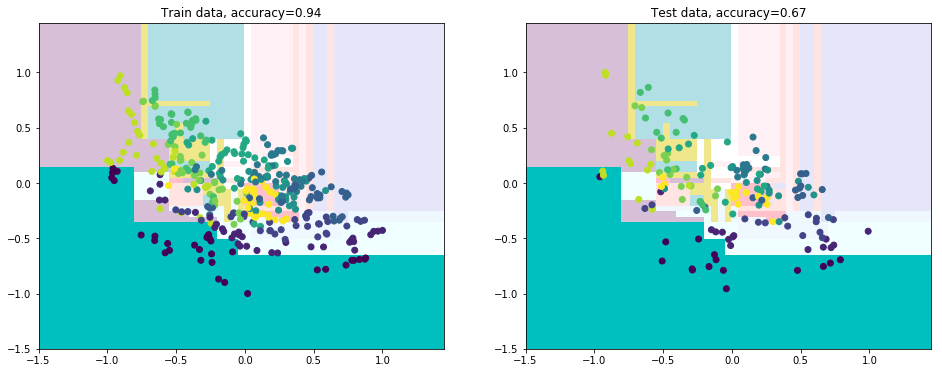

In [75]:
plot_decision_surface(clf, train_data.iloc[:,[0,1]].values, train_labels.values,
                      test_data.iloc[:,[0,1]].values, test_labels.values, light_colors = light_colors )

# Результаты:

<html>
<head>
<title>Таблица</title>
</head>
<body>
<table border="1">

<tr>
<td>Metrica</td>
<td>Decision Tree</td>
<td>Random Forest</td>
<td>GradientBoosting</td>
</tr>
<tr>
<td>Accuracy</td>
<td>0.71</td>
<td>0.88</td>
<td>0.94</td>
</tr>
<tr>
<td>f1-score</td>
<td>0.70</td>
<td>0.88</td>
<td>0.94</td>
</tr>
</table>
</body>
</html>

In [171]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_transformed = pca.fit_transform(X.iloc[:,[1,2,3,4,5,6,7,8,9,10]])

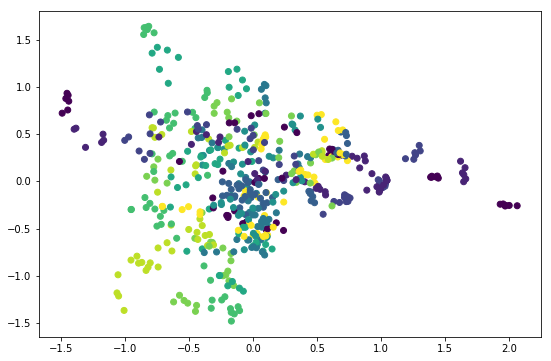

In [172]:
plot_decision_surface(clf, train_data.iloc[:,[0,1]].values, train_labels.values,
                      test_data.iloc[:,[0,1]].values, test_labels.values, light_colors = light_colors )